In [8]:
import pickle
import pandas as pd
import matplotlib.pyplot as plt

In [10]:
#read pickle file
with open('../tracker_stubs/ball_detections.pkl','rb') as f:
    ball_positions = pickle.load(f)


In [11]:
ball_positions = [x.get(1,[]) for x in ball_positions]
#convert the list into pandas dataframe
df_ball_positions = pd.DataFrame(ball_positions,columns=['x1','y1','x2','y2'])
      
#interpolate the missing values
df_ball_positions = df_ball_positions.interpolate()
df_ball_positions = df_ball_positions.bfill()

In [ ]:
df_ball_positions['mid_y'] = (df_ball_positions['y1']+df_ball_positions['y2'])/2
df_ball_positions['mid_y_rolling_mean'] =  df_ball_positions['mid_y'].rolling(window=5,min_periods=1,center=False).mean()
df_ball_positions['delta_y'] = df_ball_positions['mid_y_rolling_mean'].diff()


In [14]:
df_ball_positions

,x1,y1,x2,y2,mid_y,mid_y_rolling_mean
0,821.733582,687.153198,837.779480,704.126465,695.639832,695.639832
1,821.733582,687.153198,837.779480,704.126465,695.639832,695.639832
2,821.733582,687.153198,837.779480,704.126465,695.639832,695.639832
3,821.733582,687.153198,837.779480,704.126465,695.639832,695.639832
4,821.733582,687.153198,837.779480,704.126465,695.639832,695.639832
...,...,...,...,...,...,...
209,1184.413696,248.626617,1199.054443,265.775269,257.200943,283.675742
210,1183.796143,233.343842,1196.418213,245.940857,239.642349,269.574104
211,1182.622192,225.498077,1196.798584,241.860413,233.679245,256.927324
212,1179.966309,213.546478,1194.774414,228.973709,221.260094,244.444195


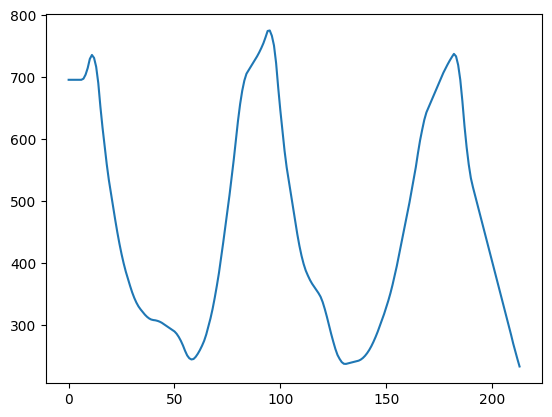

In [15]:
#plot_midy_rolling_mean
plt.plot(df_ball_positions['mid_y_rolling_mean'])

In [16]:
df_ball_positions['delta_y'] = df_ball_positions['mid_y_rolling_mean'].diff()


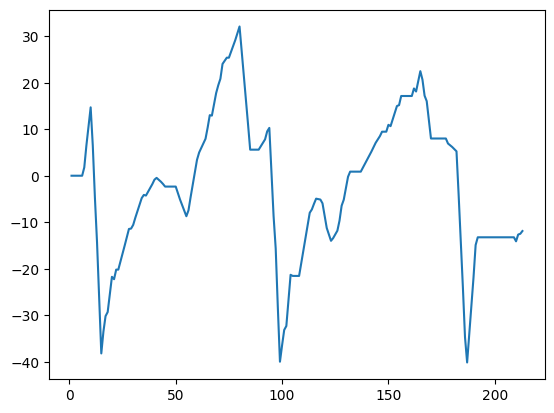

In [18]:
#plot_delta_y
plt.plot(df_ball_positions['delta_y'])

In [ ]:
df_ball_positions['ball_hit'] = 0


In [ ]:
df_ball_positions['mid_y'] = (df_ball_positions['y1']+df_ball_positions['y2'])/2
df_ball_positions['mid_y_rolling_mean'] =  df_ball_positions['mid_y'].rolling(window=5,min_periods=1,center=False).mean()
df_ball_positions['delta_y'] = df_ball_positions['mid_y_rolling_mean'].diff()


minimum_change_fmame_for_hit = 25
for i in range(1,len(df_ball_positions)-int(minimum_change_fmame_for_hit*1.2)):
    negative_position_change = df_ball_positions['delta_y'].iloc[i] > 0 and df_ball_positions['delta_y'].iloc[i+1]<0
    positive_position_change = df_ball_positions['delta_y'].iloc[i] < 0 and df_ball_positions['delta_y'].iloc[i+1]>0

    if negative_position_change or positive_position_change:
        change_count = 0
        for change_frame in range(i+1, i+int(minimum_change_fmame_for_hit*1.2)+1):
            negative_position_change_following_frame = df_ball_positions['delta_y'].iloc[i] > 0 and df_ball_positions['delta_y'].iloc[change_frame]<0
            positive_position_change_following_frame = df_ball_positions['delta_y'].iloc[i] < 0 and df_ball_positions['delta_y'].iloc[change_frame]>0


            if negative_position_change and negative_position_change_following_frame:
                change_count+=1
            elif positive_position_change and positive_position_change_following_frame:
                change_count+=1

        if change_count>minimum_change_fmame_for_hit-1:
            df_ball_positions['ball_hit'].iloc[i] = 1
frame_nums_with_ball_hits  = df_ball_positions[df_ball_positions['ball_hit']==1].index.to_list()


C:\Users\JoowonHong\AppData\Local\Temp\ipykernel_10940\1978286093.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ball_positions['ball_hit'].iloc[i] = 1
C:\Users\JoowonHong\AppData\Local\Temp\ipykernel_10940\1978286093.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ball_positions['ball_hit'].iloc[i] = 1
C:\Users\JoowonHong\AppData\Local\Temp\ipykernel_10940\1978286093.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [25]:
df_ball_positions[df_ball_positions['ball_hit']==1]

,x1,y1,x2,y2,mid_y,mid_y_rolling_mean,delta_y,ball_hit
11,777.544373,717.640320,796.565735,738.517090,728.078705,735.750946,6.487775,1
58,925.472522,241.433972,938.761877,254.690100,248.062036,243.888598,-1.916668,1
95,624.201355,748.847565,641.789246,767.176453,758.012009,775.301205,0.816891,1
131,717.301123,231.292447,731.139307,245.602762,238.447604,236.699350,-0.232046,1
182,1296.760864,740.293823,1313.070801,758.036255,749.165039,737.527277,5.247034,1


In [ ]:
frame_nums_with_ball_hits  = df_ball_positions[df_ball_positions['ball_hit']==1].index.to_list()
